In [1]:
from gradients import *

In [2]:
SUBJECTS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33,
35, 36, 38, 39, 40, 42, 43, 44, 45, 46, ]
# excluded subjects: 41, 19, 32, 27, 34, 37,
#todo why?

In [3]:
EPICS = ['baseline', 'early_learning', 'late_learning']
# rest and learning are removed in make_gradients .py

In [4]:
NUM_COMPONENTS = 4

# Global reference
changed rest to baseline

In [5]:
surf_labels, mask_removed = load_atlas()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [6]:
from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

In [7]:
surf_labels.shape

(64984,)

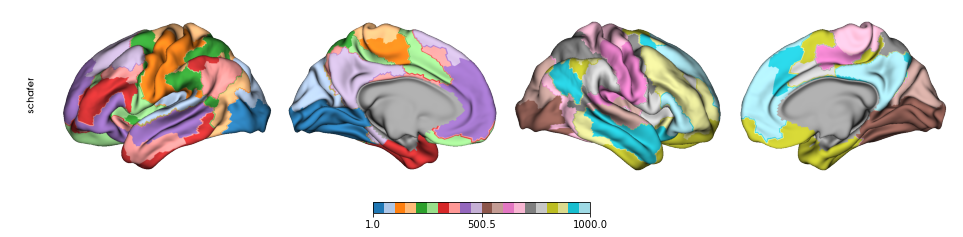

In [8]:
text_bar, color_map, data_to_show, data_range = \
        'schafer', 'tab20', surf_labels, None

p = Plot(surf_lh=surf_lh, surf_rh=surf_rh,
        size=(1600, 300),
        layout='row',
        label_text=[text_bar],
        )

p.add_layer(
data_to_show, cbar=True, cmap=color_map, color_range=data_range,
)

fig = p.build()

In [14]:
REF_EPIC = 'baseline'
global_corr_mat = np.zeros((998, 998))
for s in SUBJECTS:
    data_baseline = load_data(subj=s, epic=REF_EPIC)
    global_corr_mat += make_mat(data_baseline)
global_corr_mat /= len(SUBJECTS)

In [15]:
# make the global gradient model
DIM_RED_APPROACH = 'pca'
global_gradient_reference = GradientMaps(random_state=0, approach=DIM_RED_APPROACH)
global_gradient_reference.fit(global_corr_mat, sparsity=0.9)
#todo ? sparsity

GradientMaps(approach='pca', random_state=0)

In [16]:
grads = [{k:{} for k in EPICS} for _ in range(NUM_COMPONENTS)]

for subject in SUBJECTS:
    gm = make_gradients(subj=subject, gm_ref=global_gradient_reference)
    for component in range(NUM_COMPONENTS):
        for epic in EPICS:
            grad = gm.aligned_[EPICS.index(epic)][:, component]
            grads[component][epic][subject] = grad

In [17]:
mean_grads = [{} for _ in range(NUM_COMPONENTS)]

for component in range(NUM_COMPONENTS):
    for epic in EPICS:
        mean_grad_epic = np.mean([v for k, v in grads[component][epic].items()], axis=0)
        mean_grads[component][epic] = mean_grad_epic

---

# gradients (all global referenced)


In [26]:
def get_gradient_component(component_num=1):
    # component_num starting from one
    component_num -= 1

    grad_aligned_epics = {}

    for epic in EPICS:
        grad_aligned_epics[epic] = map_to_labels(mean_grads[component_num][epic],
        surf_labels, mask=mask_removed, fill=np.nan)

    data = [grad_aligned_epics[epic] for epic in EPICS]
    minn, maxx = min(np.concatenate(data)), max(np.concatenate(data))
    minn, maxx = np.abs(minn), np.abs(maxx)
    data_range = max(minn, maxx)
    texts = EPICS
    color_maps = ['bwr'] * len(EPICS)
    z = zip(data, texts, color_maps)

    component_num += 1
    for data_to_show, text_bar, color_map in z:
        stack_surfplot(data_to_show, 'Gradient ' + str(component_num) + ' - ' + text_bar, color_map, (-4, 4))

## gradient 1

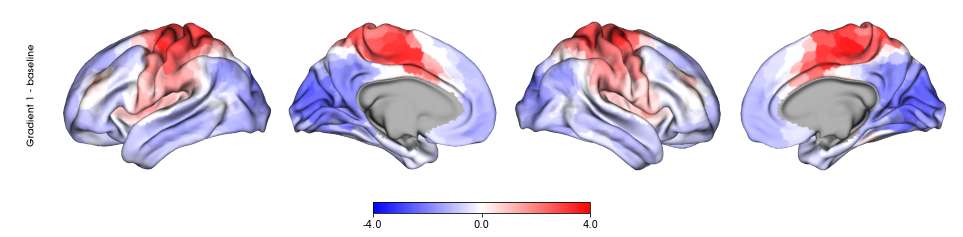

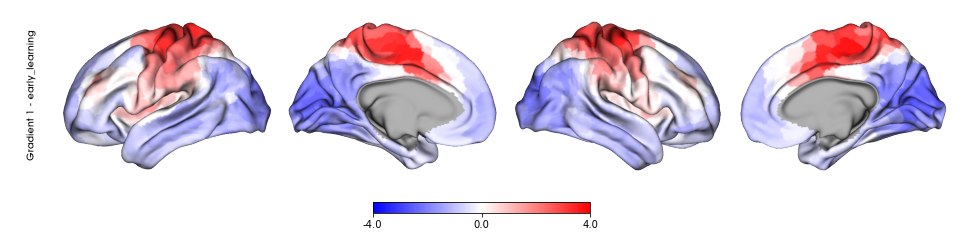

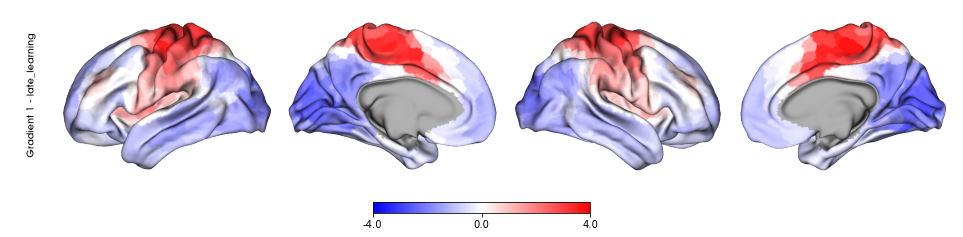

In [27]:
get_gradient_component(component_num=1)
# changed atlas

## gradient 2

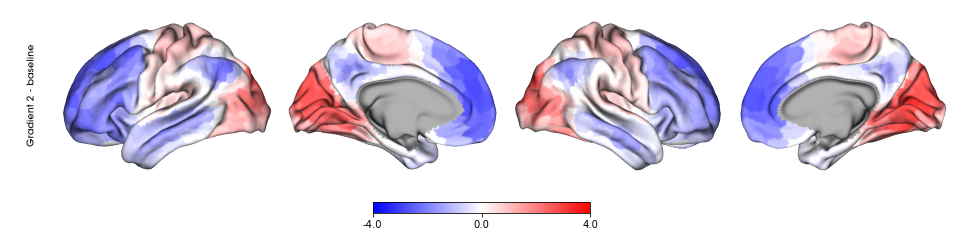

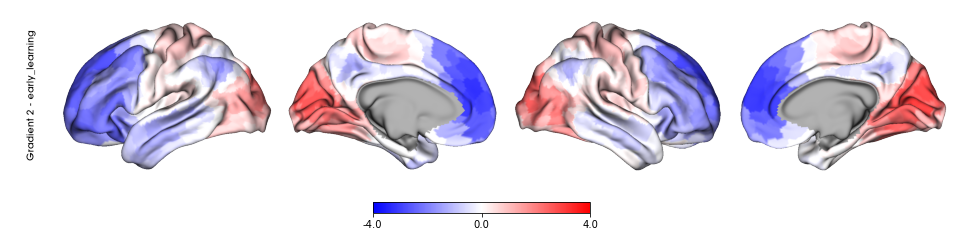

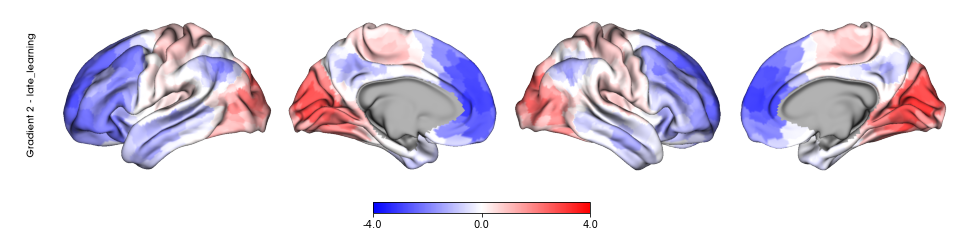

In [28]:
get_gradient_component(component_num=2)

## gradient 3

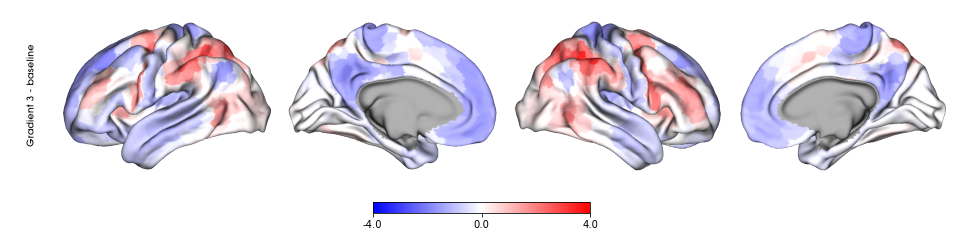

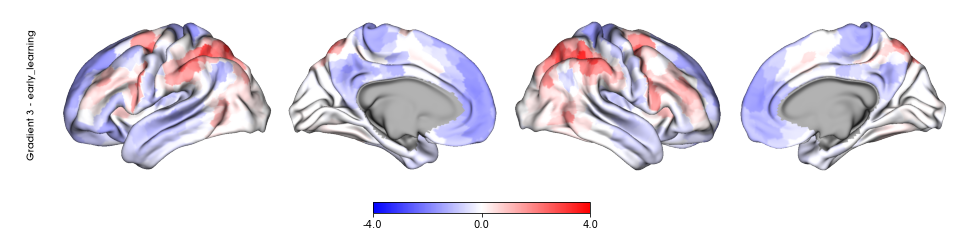

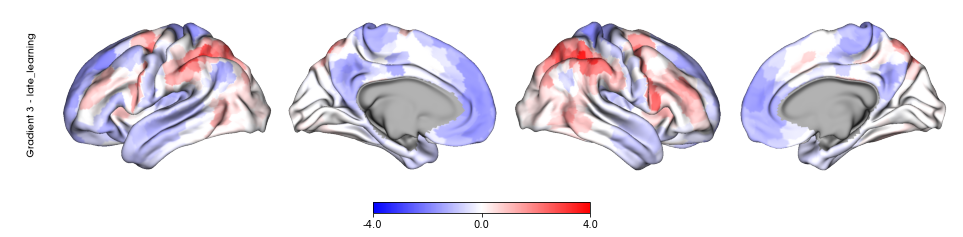

In [29]:
get_gradient_component(component_num=3)

## gradient 4

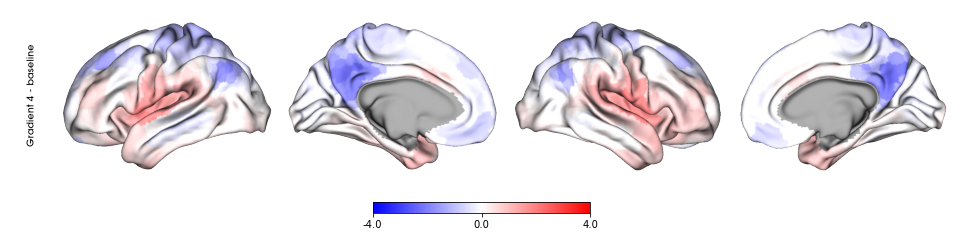

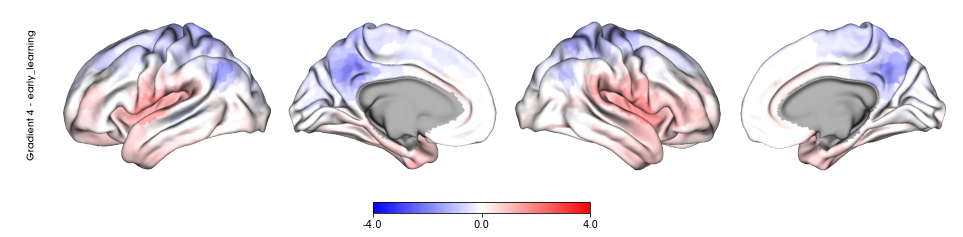

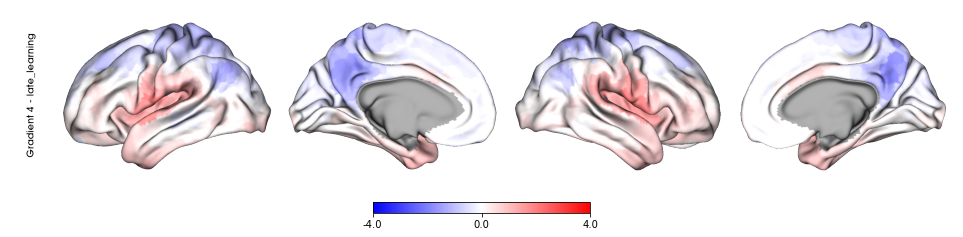

In [30]:
get_gradient_component(component_num=4)

# adding up first 3 components (eccentricity)

In [31]:
# anova on ecc of epics

In [32]:
ecc = {epic: np.zeros((998,)) for epic in EPICS}

for epic in EPICS:
    for component_num in range(3):
        ecc[epic] += mean_grads[component_num][epic] ** 2
    ecc[epic] = np.sqrt(ecc[epic])

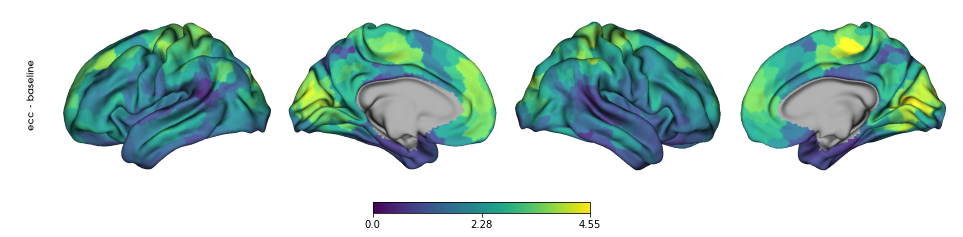

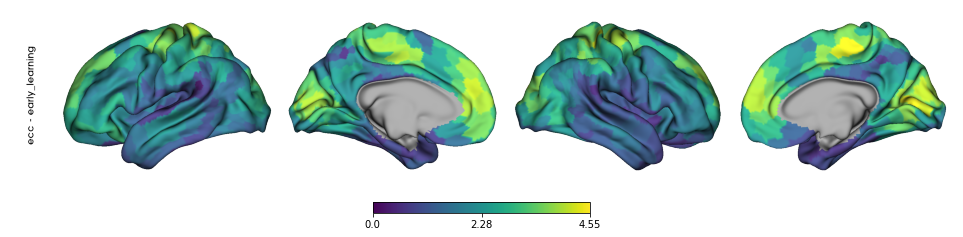

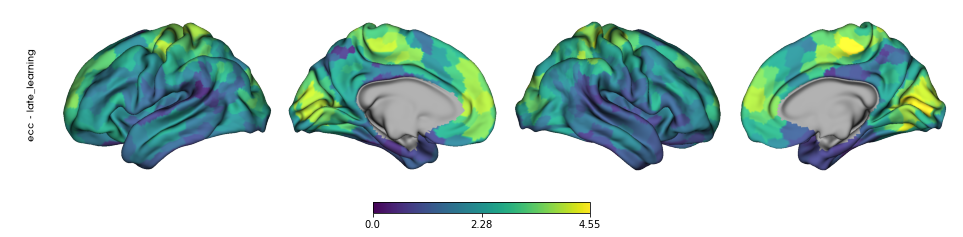

In [33]:
ecc_show = {}

for epic in EPICS:
    ecc_show[epic] = map_to_labels(ecc[epic],
    surf_labels, mask=mask_removed, fill=np.nan)

data = [ecc_show[epic] for epic in EPICS]
minn, maxx = min(np.concatenate(data)), max(np.concatenate(data))
minn, maxx = np.abs(minn), np.abs(maxx)
data_range = max(minn, maxx)
texts = EPICS
color_maps = ['viridis'] * len(EPICS)
z = zip(data, texts, color_maps)
z = list(z)


for data_to_show, text_bar, color_map in z:
    stack_surfplot(
        data_to_show, 'ecc - ' + text_bar, color_map, (0, data_range)
     )

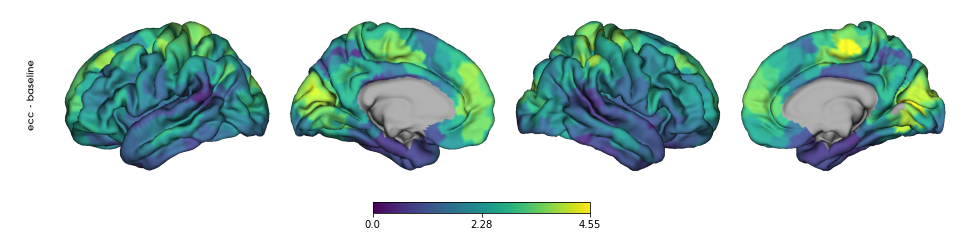

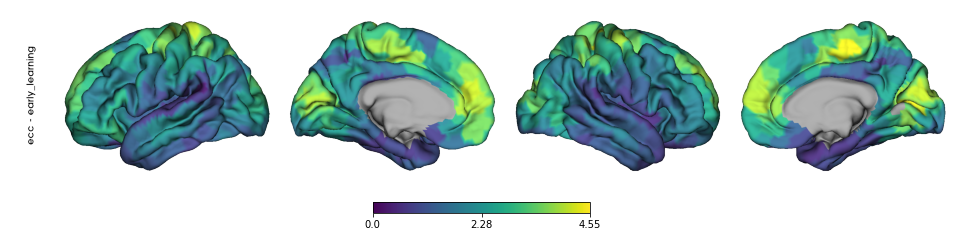

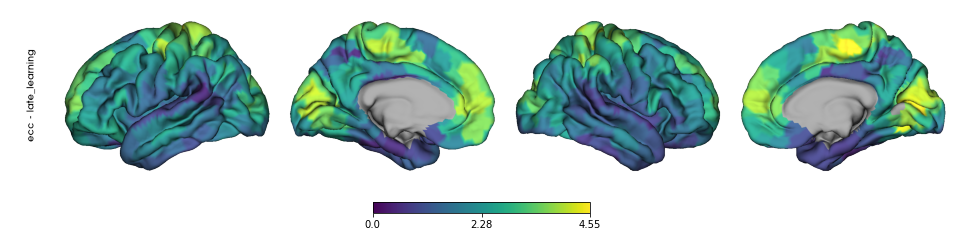

In [ ]:
ecc_show = {}

for epic in EPICS:
    ecc_show[epic] = map_to_labels(ecc[epic],
    surf_labels, mask=mask_removed, fill=np.nan)

data = [ecc_show[epic] for epic in EPICS]
minn, maxx = min(np.concatenate(data)), max(np.concatenate(data))
minn, maxx = np.abs(minn), np.abs(maxx)
data_range = max(minn, maxx)
texts = EPICS
color_maps = ['viridis'] * len(EPICS)
z = zip(data, texts, color_maps)
z = list(z)


for data_to_show, text_bar, color_map in z:
    stack_surfplot(
        data_to_show, 'ecc - ' + text_bar, color_map, (0, data_range)
     )

---
exploration on ecc

In [ ]:
ecc.keys()

dict_keys(['baseline', 'early_learning', 'late_learning'])

In [ ]:
b, e, l = ecc['baseline'], ecc['early_learning'], ecc['late_learning']

In [ ]:
df = pd.DataFrame()
for e in ecc.keys():    
    d = pd.DataFrame(ecc[e], columns=['value'])
    d['epic'] = e
    df = pd.concat([d, df], axis=0)

In [ ]:
import seaborn as sns

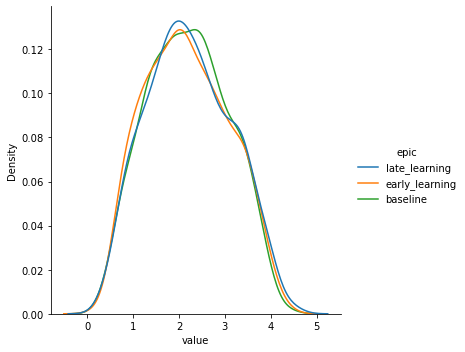

In [ ]:
sns.displot(data=df.reset_index(), x='value', hue='epic', kind="kde")

In [ ]:
df

value           epic
0    0.440442  late_learning
1    1.551077  late_learning
2    1.417444  late_learning
3    2.675909  late_learning
4    1.731690  late_learning
..        ...            ...
993  2.937156       baseline
994  1.064733       baseline
995  1.851575       baseline
996  2.266211       baseline
997  1.708324       baseline

[2994 rows x 2 columns]

In [ ]:
def dict2df(dickt):
    df = pd.DataFrame()
    for e in dickt.keys():    
        d = pd.DataFrame(dickt[e], columns=['value'])
        d['key'] = e
        df = pd.concat([d, df], axis=0)
    return df

In [ ]:
grads[0]['baseline'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46])

In [ ]:
df2 = dict2df(grads[0]['early_learning'])

In [ ]:
df2.shape[0]/998

40.0

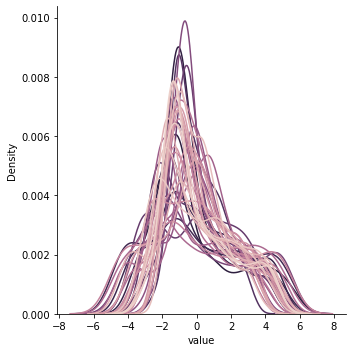

In [ ]:
sns.displot(data=df2.reset_index(), x='value', hue='key', kind="kde", legend=False)

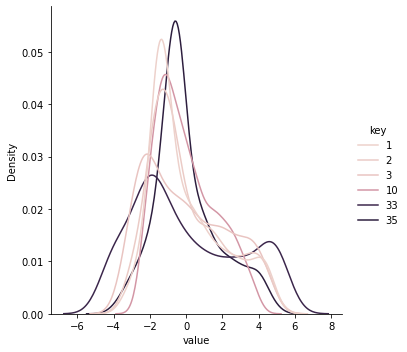

In [ ]:
df3 = df2[df2.key.isin([1, 2, 3, 10, 32, 33, 35])]
sns.displot(data=df3.reset_index(), x='value', hue='key', kind="kde")

In [ ]:
df2.groupby('key').agg({'value': np.std})

value
key          
1    2.015617
2    2.048140
3    2.291757
4    2.018997
5    1.397150
6    2.021809
7    2.497640
8    2.201187
9    1.572004
10   1.596050
11   2.255714
12   1.904094
13   1.694640
14   2.137232
15   1.712998
16   2.154228
17   3.064826
18   2.093182
20   1.885498
21   1.460187
22   2.404434
23   2.929601
24   2.340489
25   1.840909
26   2.316416
28   1.886066
29   1.852216
30   2.208272
31   1.509632
33   2.916109
35   1.763749
36   2.407227
38   2.192066
39   1.340686
40   1.902074
42   2.994669
43   2.480392
44   2.425069
45   1.762062
46   2.436933